In [1]:
import nest
import numpy as np
import pandas as pd


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: master@66255beb5
 Built: Sep 28 2022 14:26:52

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
nest.Install('stepcurrentmodule')


Sep 28 22:44:38 Install [Info]: 
    loaded module Step Current Module


In [71]:
nest.ResetKernel()

In [72]:
model = 'iaf_cond_exp'

In [73]:
I_step = 20*np.array([10., -20., 30., -40., 50.])
t_step = np.array([10., 30., 40., 45., 50.])

In [74]:
n = nest.Create(f'{model}_sc', params={'amplitude_values': I_step, 
                                           'amplitude_times': t_step})

In [75]:
vm = nest.Create('voltmeter', params={'interval': 0.1})

In [76]:
nest.Connect(vm, n)

In [77]:
scg = nest.Create('step_current_generator', params={'amplitude_values': I_step, 
                                              'amplitude_times': t_step-1})
nr = nest.Create(model)
nest.Connect(scg, nr)
nest.Connect(vm, nr)

In [78]:
nest.Simulate(100)


Sep 28 22:50:21 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Sep 28 22:50:21 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 100
    Not using OpenMP
    Not using MPI

Sep 28 22:50:21 SimulationManager::run [Info]: 
    Simulation finished.


In [79]:
n.set({'amplitude_values': I_step, 'amplitude_times': 100+t_step})

In [80]:
scg.set({'amplitude_values': I_step, 'amplitude_times': 100+t_step})

In [81]:
nest.Simulate(100)


Sep 28 22:50:23 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Sep 28 22:50:23 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 100
    Not using OpenMP
    Not using MPI

Sep 28 22:50:23 SimulationManager::run [Info]: 
    Simulation finished.


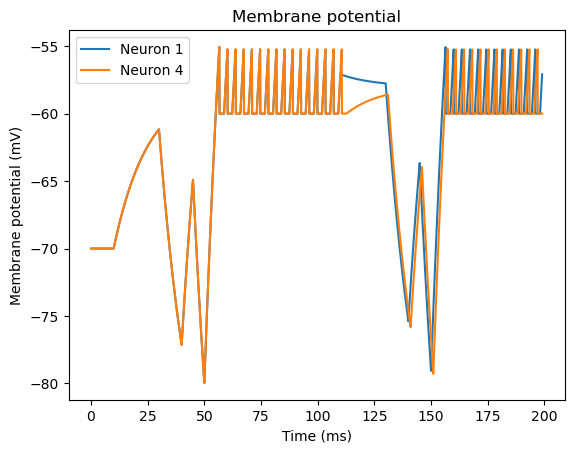

In [82]:
nest.voltage_trace.from_device(vm);

In [73]:
d = pd.DataFrame.from_records(vm.events)

In [74]:
dm = pd.merge(d.loc[d.senders==1], d.loc[d.senders==4], on='times').drop(['senders_x', 'senders_y'], axis=1).set_index('times')

In [75]:
dm.loc[109:111]

,V_m_x,V_m_y
times,,
109.0,-67.068491,-67.068491
109.1,-67.068036,-67.068036
109.2,-67.067584,-67.067584
109.3,-67.067135,-67.067135
109.4,-67.066689,-67.066689
109.5,-67.066246,-67.066246
109.6,-67.065806,-67.065806
109.7,-67.065368,-67.065368
109.8,-67.064934,-67.064934


In [20]:
dm.iloc[-5:]

,V_m_x,V_m_y
times,,
98.6,-67.137002,-67.137002
98.7,-67.136091,-67.136091
98.8,-67.135187,-67.135187
98.9,-67.134289,-67.134289
99.0,-67.133397,-67.133397
